In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

**1. Скачать любой понравившийся вам датасет с UCI repository(можете даже свой какой-то взять) и сразу же разделите его на тренировочную и тестовую выборки. Тестовую выборку сохраните на диск и больше не трогайте.**

In [2]:
data = pd.read_csv("train.csv", index_col=0)
data.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
Id,,,,,,,,,,,,
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [3]:
train, test = train_test_split(data, test_size=0.3)

**2. Провести EDA (exploratory data analysis: histograms, boxplots - visualization, etc). Например**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 6615 to 5083
Data columns (total 12 columns):
age                    7000 non-null float64
years_of_experience    7000 non-null float64
lesson_price           7000 non-null float64
qualification          7000 non-null float64
physics                7000 non-null float64
chemistry              7000 non-null float64
biology                7000 non-null float64
english                7000 non-null float64
geography              7000 non-null float64
history                7000 non-null float64
mean_exam_points       7000 non-null float64
choose                 7000 non-null int64
dtypes: float64(11), int64(1)
memory usage: 710.9 KB


In [5]:
train.nunique()

age                    46
years_of_experience    10
lesson_price           69
qualification           4
physics                 2
chemistry               2
biology                 2
english                 2
geography               2
history                 2
mean_exam_points       66
choose                  2
dtype: int64

In [6]:
train.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,45.748714,1.970143,1694.121429,1.713286,0.373286,0.122000,0.120143,0.060143,0.029714,0.017286,64.257000,0.109143
std,8.043628,1.766024,519.767222,0.792662,0.483712,0.327309,0.325152,0.237768,0.169810,0.130343,13.521567,0.311841
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000
max,68.000000,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000


Text(0.5, 1.0, 'Target distribution')

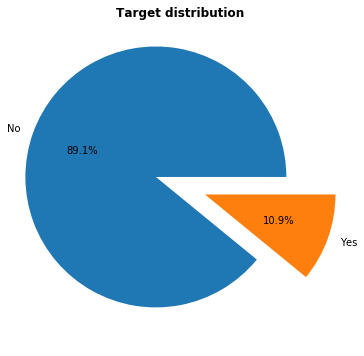

In [7]:
plt.figure(figsize=(6,6))
explode =(0.2,0.2)
plt.pie(train['choose'].value_counts(), labels= ['No','Yes'], autopct='%.1f%%',explode = explode)
plt.title("Target distribution", fontweight = 'bold')

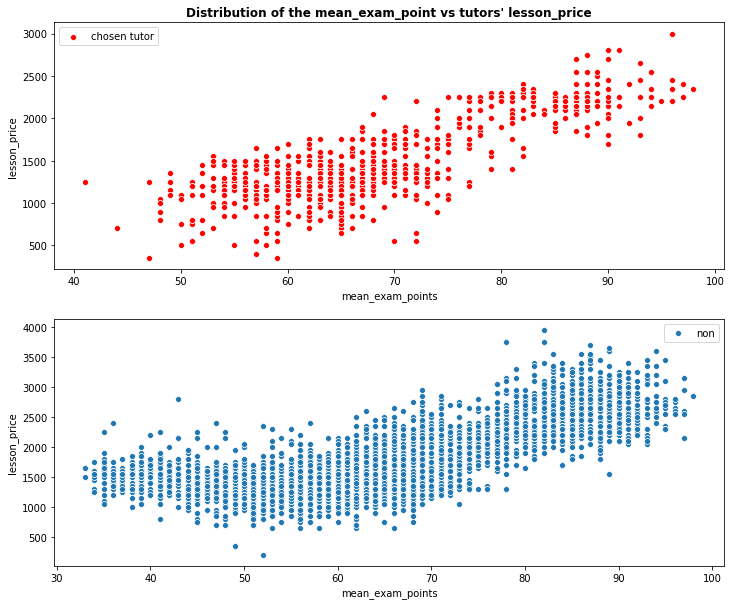

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax1, ax2 = ax
fig.set_size_inches(12,10)
sns.scatterplot(train[(train['choose']==1)]['mean_exam_points'], train[(train['choose']==1)]['lesson_price'], ax = ax1, label = 'chosen tutor', color = 'r' )
sns.scatterplot(train[(train['choose']==0)]['mean_exam_points'], train[(train['choose']==0)]['lesson_price'], ax = ax2, label = 'non' )
plt.subplots_adjust(hspace = 0.2)

plt.legend()
ax1.set_title("Distribution of the mean_exam_point vs tutors' lesson_price", fontweight = 'bold')
plt.show()

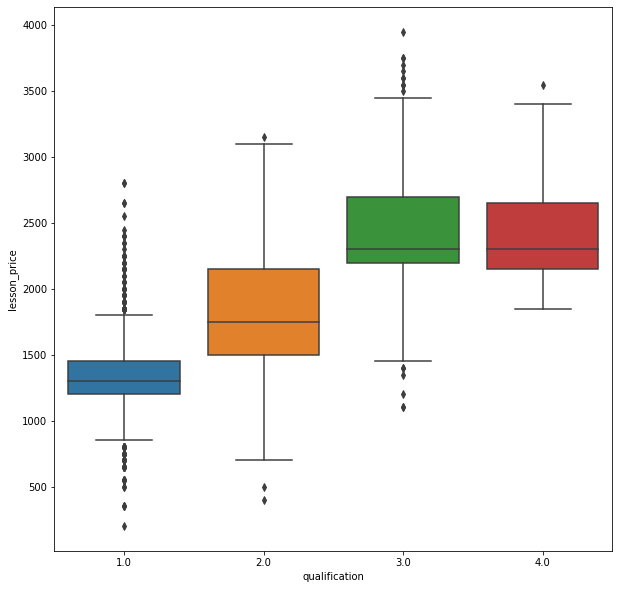

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(train.qualification, train.lesson_price)

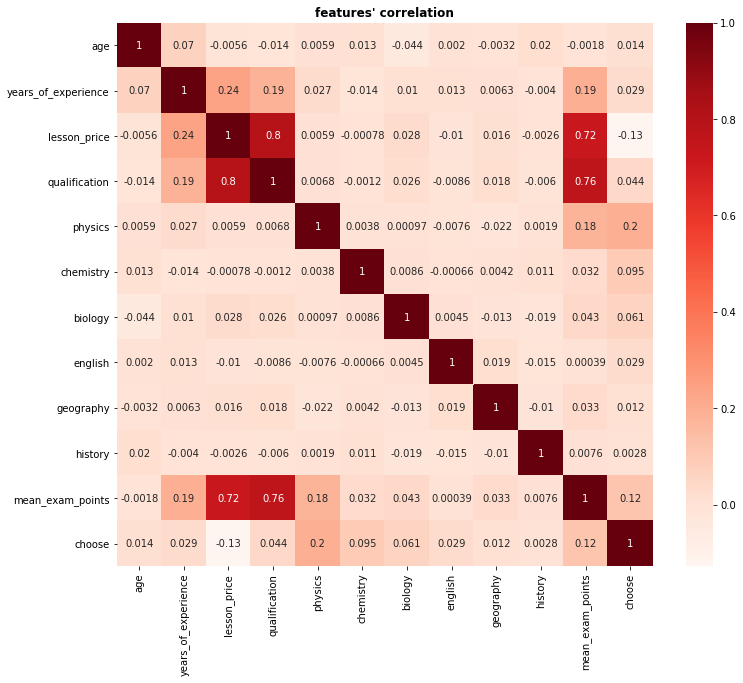

In [10]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("features' correlation", fontweight = 'bold')
plt.show()

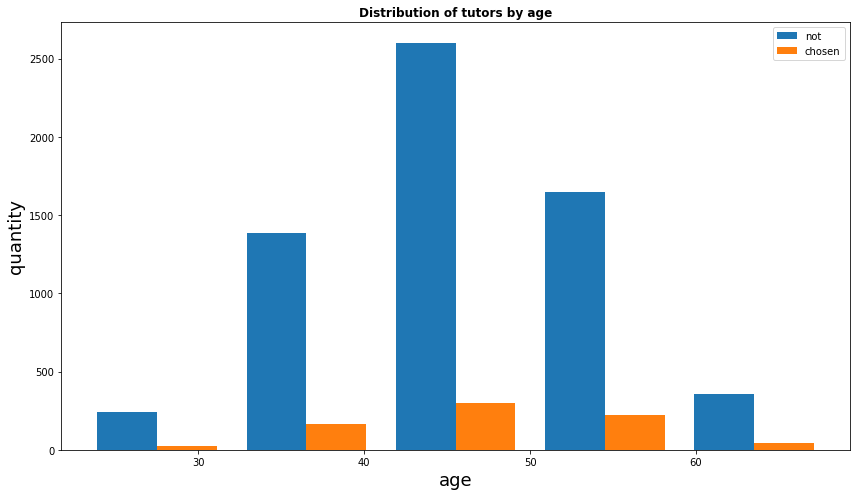

In [11]:
plt.figure(figsize=(12,7))
plt.hist([train[train['choose'] == 0 ]['age'], train[train['choose'] == 1 ]['age']], bins=5, label = ['not','chosen'])

plt.title('Distribution of tutors by age', fontweight = 'bold')
plt.xlabel('age', fontsize=18)
plt.ylabel('quantity', fontsize=18)
plt.tight_layout()
plt.legend()

In [12]:
#Eliminating outliers как и говорили сделал это до Piplene и Transformer ов
def qualification_outliers(train):
    for i in train['qualification'].unique():
        Q3 = train[(train['qualification']==i)]['lesson_price'].quantile(0.75)
        Q1 = train[(train['qualification']==i)]['lesson_price'].quantile(0.25)
        IQR = Q3 - Q1
        train[(train['qualification']==i)] = train[(train['qualification']==i)].query('lesson_price <= (@Q3 + 1.5 * @IQR)')
    train = train[train['lesson_price'].notna()]
    return train

In [13]:
train = qualification_outliers(train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

**3. Сделать feature engineering. При этом постарайтесь «завернуть» ваш код для преобразования данных в классы или функции (пример Transformer как в ноутбуке).**

### sklearn Transformers

In [14]:
#Separating catagorical and numerical columns
Id_col     = ['Id']
target_col = ["choose"]
cat_cols   = train.nunique()[train.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in train.columns if x not in cat_cols + target_col + Id_col]

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
    

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

class AgeSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def calc_age_category(age):
            if age <= 30:
                age_category = 'age_0-30'
            elif (age > 30) & (age <= 40 ):
                age_category = 'age_30-40'
            elif (age > 40) & (age <= 50 ):
                age_category = 'age_40-50'
            elif (age > 50) & (age <= 60 ):
                age_category = 'age_50-60'
            elif (age > 60):
                age_category = 'age_60'
            return age_category
        return X[self.key].apply(lambda x: calc_age_category(x), 1)

In [16]:
cat_cols

['qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history']

**Pipeline**

In [17]:
age = Pipeline([
                ('selector', AgeSelector(key='age')),
                ('ohe', OHEEncoder(key='age'))
     ])

qualification = Pipeline([
                ('selector', ColumnSelector(key='qualification')),
                ('ohe', OHEEncoder(key='qualification'))
            ])
physics = Pipeline([
                ('selector', ColumnSelector(key='physics')),
                ('ohe', OHEEncoder(key='physics'))
            ])
chemistry = Pipeline([
                ('selector', ColumnSelector(key='chemistry')),
                ('ohe', OHEEncoder(key='chemistry'))
            ])
biology = Pipeline([
                ('selector', ColumnSelector(key='biology')),
                ('ohe', OHEEncoder(key='biology'))
            ])
english = Pipeline([
                ('selector', ColumnSelector(key='english')),
                ('ohe', OHEEncoder(key='english'))
            ])
geography = Pipeline([
                ('selector', ColumnSelector(key='geography')),
                ('ohe', OHEEncoder(key='geography'))
            ])
history = Pipeline([
                ('selector', ColumnSelector(key='history')),
                ('ohe', OHEEncoder(key='history'))
            ])

Теперь для вещественных переменных

In [18]:
num_cols

['age', 'years_of_experience', 'lesson_price', 'mean_exam_points']

In [19]:
years_of_experience =  Pipeline([
                ('selector', NumberSelector(key='years_of_experience')),
                ('standard', StandardScaler())
            ])
lesson_price =  Pipeline([
                ('selector', NumberSelector(key='lesson_price')),
                ('standard', StandardScaler())
            ])
mean_exam_points =  Pipeline([
                ('selector', NumberSelector(key='mean_exam_points')),
                ('standard', StandardScaler())
            ])

In [20]:
feats = FeatureUnion([('qualification', qualification), 
                      ('age', age),
                      ('physics', physics),
                      ('chemistry', chemistry ),
                      ('biology', biology),
                      ('english', english),
                      ('geography', geography),
                      ('history', history),
                      ('years_of_experience', years_of_experience),
                      ('lesson_price', lesson_price),
                      ('mean_exam_points', mean_exam_points)
                     ])

feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(train)

array([[ 1.        ,  0.        ,  0.        , ...,  0.03411491,
        -0.26464687, -1.58006882],
       [ 1.        ,  0.        ,  0.        , ..., -0.53755822,
        -0.0704065 , -1.65423744],
       [ 1.        ,  0.        ,  0.        , ...,  0.03411491,
        -0.55600741, -0.02252775],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.17746117,
        -0.36176705, -0.61587673],
       [ 0.        ,  1.        ,  0.        , ..., -1.10923135,
        -0.45888723, -0.54170811],
       [ 1.        ,  0.        ,  0.        , ...,  0.03411491,
        -0.45888723, -0.24503362]])

**Построение модели**

In [21]:
Y_train = train['choose']
X_train = train.drop('choose', 1)

Id
6615    0.0
7052    0.0
6885    0.0
4446    0.0
8457    0.0
       ... 
8039    1.0
2290    0.0
1010    1.0
7952    1.0
5083    0.0
Name: choose, Length: 6904, dtype: float64

In [25]:
Y_test = test['choose']
X_test = test.drop('choose', 1)

In [29]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [28]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBClassifier(random_state = 42))
     ])
    
pipeline.fit(X_train, Y_train)

preds = pipeline.predict(X_test)
np.mean(preds == Y_test)

0.885

In [37]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'classifier', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__qualification', 'features__age', 'features__physics', 'features__chemistry', 'features__biology', 'features__english', 'features__geography', 'features__history', 'features__years_of_experience', 'features__lesson_price', 'features__mean_exam_points', 'features__qualification__memory', 'features__qualification__steps', 'features__qualification__verbose', 'features__qualification__selector', 'features__qualification__ohe', 'features__qualification__selector__key', 'features__qualification__ohe__key', 'features__age__memory', 'features__age__steps', 'features__age__verbose', 'features__age__selector', 'features__age__ohe', 'features__age__selector__key', 'features__age__ohe__key', 'features__physics__memory', 'features__physics__steps', 'features__physics__verbose', 'features__physics__selector', 'features__p

In [43]:
param_test= {
    'classifier__n_estimators' : [100,300,500,700],
    'classifier__max_depth':[3,4,5],
    'classifier__min_child_weight':[0.5, 1, 1.5, 2],
    'classifier__learning_rate': [0.1, 0.2, 0.3, 0.5] }

In [44]:
%%time

clf = GridSearchCV(pipeline, param_test, cv=5)
 
# Fit and tune model
clf.fit(X_train, Y_train)

CPU times: user 46min 1s, sys: 15.5 s, total: 46min 17s
Wall time: 11min 54s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('qualification',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnSelector(key='qualification')),
                                                                                        ('ohe',
                                                                                         OHEEncoder(key='qualification'))])),
                                                                       ('age',
                                                                        Pipeline(steps=[('selector',
                                                                                         AgeSelector(key='age')),
                                                                                        ('ohe',


In [45]:
clf.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 3,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 100}

In [47]:
#refitting on entire training data using best settings
clf.refit

preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)

np.mean(preds == Y_test)

0.893

**7.Сохраните модель на диск**

In [48]:
import dill

In [49]:
with open("model_trained_XGB.dill", "wb") as f:
    dill.dump(pipeline, f)